## Using LSTM Neural Network to Classify Music Genre

In [1]:
import logging
import os
# deep learning modeling
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers import BatchNormalization
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.optimizers import rmsprop
# module that extracts features and save as a numpy file
from FeatureExtracter import *

Using TensorFlow backend.


In [2]:
features = Features()

In [3]:
# preprocess audio and generate Training Data, Evaluation Data and Test Data
print("Preprocessing raw audio files")
features.load_preprocess_data()

print("Training X shape: " + str(features.train_X.shape))
print("Training Y shape: " + str(features.train_Y.shape))
print("Dev X shape: " + str(features.dev_X.shape))
print("Dev Y shape: " + str(features.dev_Y.shape))
print("Test X shape: " + str(features.test_X.shape))
print("Test Y shape: " + str(features.test_Y.shape))

acted features audio track 134 of 420.
Extracted features audio track 135 of 420.
Extracted features audio track 136 of 420.
Extracted features audio track 137 of 420.
Extracted features audio track 138 of 420.
Extracted features audio track 139 of 420.
Extracted features audio track 140 of 420.
Extracted features audio track 141 of 420.
Extracted features audio track 142 of 420.
Extracted features audio track 143 of 420.
Extracted features audio track 144 of 420.
Extracted features audio track 145 of 420.
Extracted features audio track 146 of 420.
Extracted features audio track 147 of 420.
Extracted features audio track 148 of 420.
Extracted features audio track 149 of 420.
Extracted features audio track 150 of 420.
Extracted features audio track 151 of 420.
Extracted features audio track 152 of 420.
Extracted features audio track 153 of 420.
Extracted features audio track 154 of 420.
Extracted features audio track 155 of 420.
Extracted features audio track 156 of 420.
Extracted featu

In [5]:
# build LSTM model
input_shape = (features.train_X.shape[1], features.train_X.shape[2])

model = Sequential()

model.add(LSTM(units=128, 
               dropout=0.05, 
               recurrent_dropout=0.35, 
               return_sequences=True, 
               input_shape=input_shape))
model.add(LSTM(units=32,  
               dropout=0.05, 
               recurrent_dropout=0.35, 
               return_sequences=False))
model.add(Dense(units=features.train_Y.shape[1], 
                activation="softmax"))

model.compile(loss="categorical_crossentropy", 
              optimizer='adam', 
              metrics=["accuracy"])
model.summary()



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 128, 128)          82944     
_________________________________________________________________
lstm_4 (LSTM)                (None, 32)                20608     
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 264       
Total params: 103,816
Trainable params: 103,816
Non-trainable params: 0
_________________________________________________________________


In [6]:
# train model
batch_size = 70  
num_epochs = 800
history = model.fit(
    features.train_X,
    features.train_Y,
    batch_size=batch_size,
    epochs=num_epochs,
)

 accuracy: 0.9071
Epoch 607/800
420/420 [==============================] - 3s 7ms/step - loss: 0.2225 - accuracy: 0.9143
Epoch 608/800
420/420 [==============================] - 3s 7ms/step - loss: 0.2237 - accuracy: 0.9310
Epoch 609/800
420/420 [==============================] - 3s 7ms/step - loss: 0.2660 - accuracy: 0.9048
Epoch 610/800
420/420 [==============================] - 3s 7ms/step - loss: 0.2879 - accuracy: 0.8976
Epoch 611/800
420/420 [==============================] - 3s 7ms/step - loss: 0.2273 - accuracy: 0.9167
Epoch 612/800
420/420 [==============================] - 3s 7ms/step - loss: 0.2175 - accuracy: 0.9190
Epoch 613/800
420/420 [==============================] - 3s 7ms/step - loss: 0.1967 - accuracy: 0.9262
Epoch 614/800
420/420 [==============================] - 3s 7ms/step - loss: 0.1976 - accuracy: 0.9190
Epoch 615/800
420/420 [==============================] - 3s 7ms/step - loss: 0.2426 - accuracy: 0.9095
Epoch 616/800
420/420 [==============================] 

dict_keys(['loss', 'accuracy'])


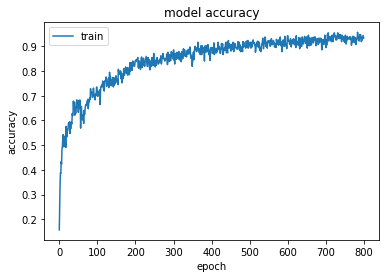

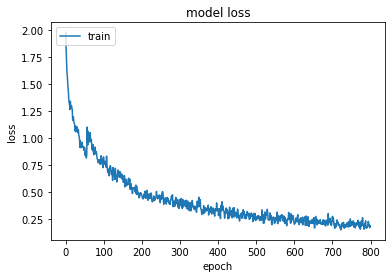

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('M8_LSTM_training_accuracy')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('M8_LSTM_training_loss')
plt.show()

In [9]:
# run evaluations
print("\nValidating ...")
score, accuracy = model.evaluate(
    features.dev_X, features.dev_Y, batch_size=batch_size, verbose=1
)
print("Dev loss:  ", score)
print("Dev accuracy:  ", accuracy)


print("\nTesting ...")
score, accuracy = model.evaluate(
    features.test_X, features.test_Y, batch_size=batch_size, verbose=1
)
print("Test loss:  ", score)
print("Test accuracy:  ", accuracy)


# Save the weights
model.save_weights('M8_LSTM__model_weights.h5')

# Save the model architecture
with open('M8_lstm_model_architecture.json', 'w') as f:
    f.write(model.to_json())


Validating ...
120/120 [==============================] - 0s 4ms/step
Dev loss:   1.431736409664154
Dev accuracy:   0.6583333611488342

Testing ...
60/60 [==============================] - 0s 2ms/step
Test loss:   1.0805511474609375
Test accuracy:   0.6666666865348816
